### What is a Decision Tree?
A decision tree is one of the most frequently used Machine Learning algorithms for solving regression as well as classification problems. As the name suggests, the algorithm uses a tree-like model of decisions to either predict the target value (regression) or predict the target class (classification). Before diving into how decision trees work, first, let us be familiar with the basic terminologies of a decision tree:

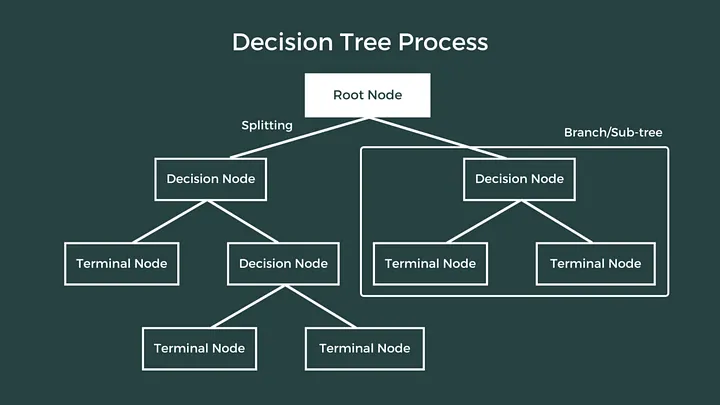

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [15]:
df1 = pd.read_csv("petrol_consumption.csv")
df1.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [16]:
x = df1.drop('Petrol_Consumption', axis = 1)
y = df1['Petrol_Consumption'] #target

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=28)

In [18]:
model = DecisionTreeRegressor(random_state= 0)

model.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=0)

In [19]:
y_pred  = model.predict(X_test)

rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
print("\nRMSE: ", rmse)


RMSE:  133.351


In [20]:
from sklearn.tree import export_graphviz

# export the decision tree model to a tree_structure.dot file 
# paste the contents of the file to webgraphviz.com

export_graphviz(model, out_file = 'tree_structure.dot',feature_names = ['Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)'])


In [4]:
!pip install graphviz

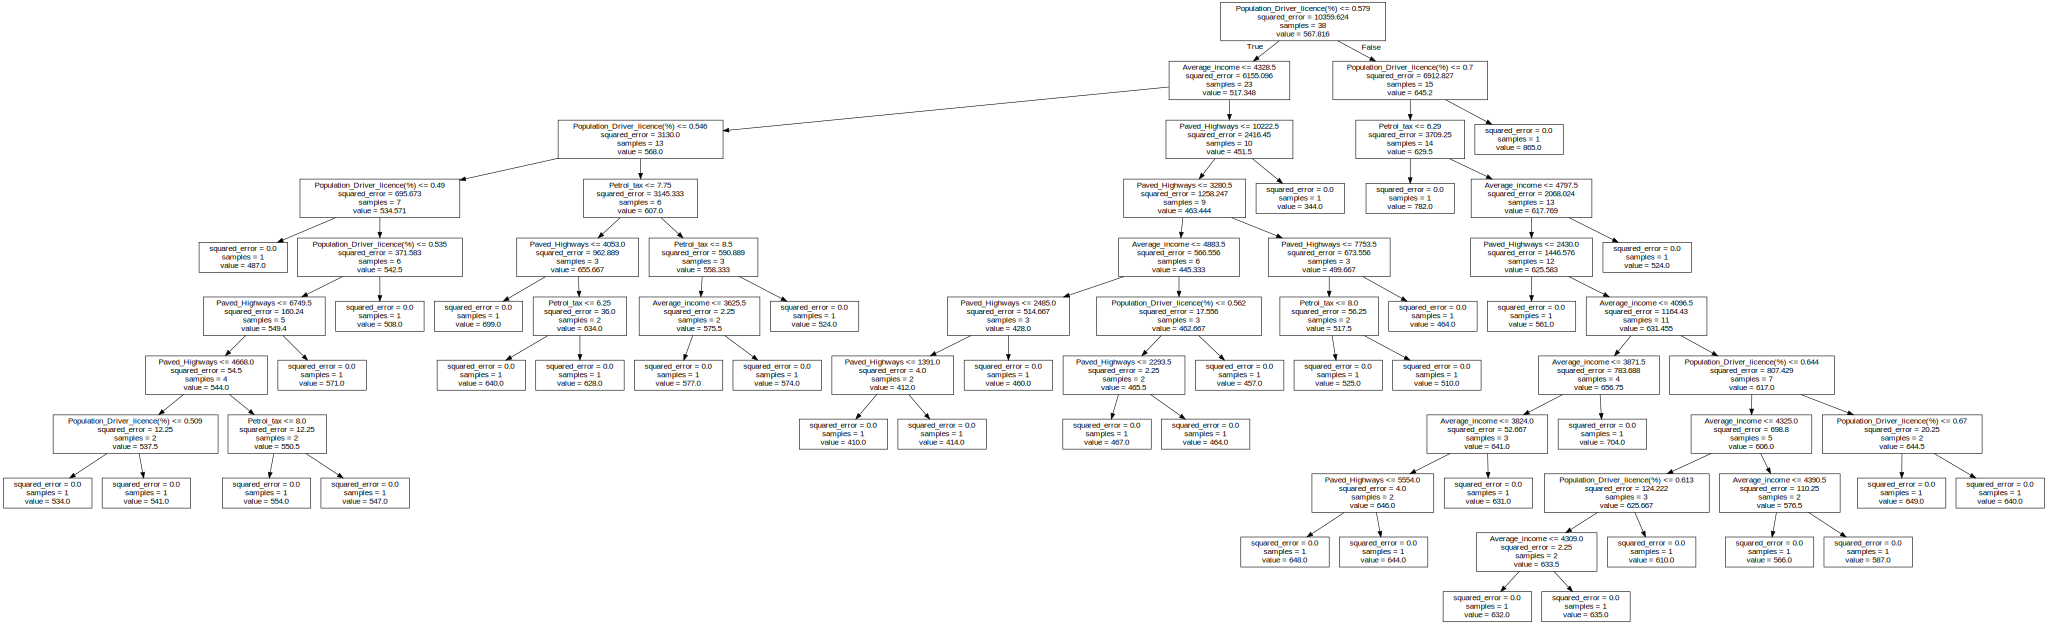

In [1]:
from graphviz import Source

# Load the .dot file
dot_path = "tree_structure.dot"
with open(dot_path) as f:
    dot_graph = f.read()

# Visualize the graph
Source(dot_graph)

## Random Forest Regression

Random Forests that are essentially a collection of many decision trees. Random forests or random decision forests are an ensemble learning method that uses multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms mostly for solving classification and regression problems.

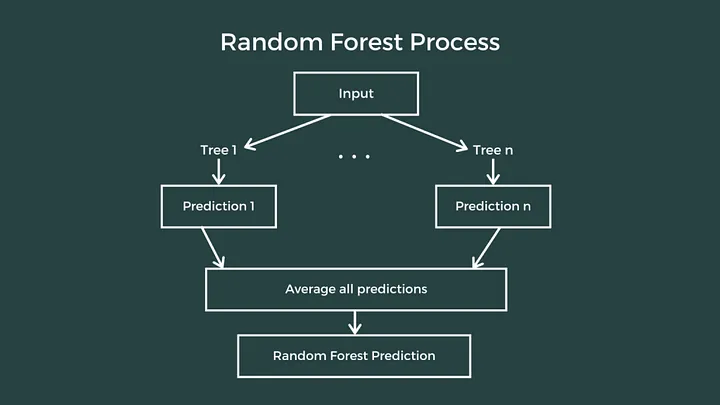

### What is Random Forest Regression?
Random Forest Regression algorithms are a class of Machine Learning algorithms that use the combination of multiple random decision trees each trained on a subset of data. The use of multiple trees gives stability to the algorithm and reduces variance. The random forest regression algorithm is a commonly used model due to its ability to work well for large and most kinds of data.

In [1]:
import numpy as np
import pandas as pd
import requests, io
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [5]:
df = pd.read_csv("petrol_consumption.csv")
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [6]:
x = df.drop('Petrol_Consumption', axis = 1)  # Features
y = df['Petrol_Consumption']  # Target

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 28)

In [9]:
# Initializing the random forest regression model with 10 decision trees
model = RandomForestRegressor(n_estimators= 10, random_state= 0)

# Fitting the random forest regression model to the data
model.fit(x_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [11]:
# Predicting the target values of the test set
y_pred  = model.predict(x_test)

# RMSE (Root Mean Squared Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
print("\nRMSE: ", rmse)


RMSE:  96.389
